### Loading the data

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from datetime import datetime
from glob import glob
from collections import Counter

In [2]:
#useful for image utility
import tensorflow as tf
print(tf.__version__)
#from keras.preprocessing import image
# you dont need this here this has been changed

2.12.0


In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 0606-FA3E

 Directory of c:\Users\slm\Desktop\LINUX\pytorch

05/04/2023  15:54    <DIR>          .
05/04/2023  15:54    <DIR>          ..
05/04/2023  15:54    <DIR>          .ipynb_checkpoints
07/03/2023  19:35           162,488 88GAN.ipynb
05/04/2023  15:54    <DIR>          facialrecog
17/05/2023  14:02            95,444 facialrecognition.ipynb
05/04/2023  15:54    <DIR>          gan_images
05/04/2023  15:54    <DIR>          MNIST
05/04/2023  15:54    <DIR>          Storck_trading_DRL
25/03/2023  21:27           271,671 uncertainityestimation.ipynb
               3 File(s)        529,603 bytes
               7 Dir(s)  360,202,866,688 bytes free


In [4]:
cd facialrecog

c:\Users\slm\Desktop\LINUX\pytorch\facialrecog


In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 0606-FA3E

 Directory of c:\Users\slm\Desktop\LINUX\pytorch\facialrecog

05/04/2023  15:54    <DIR>          .
05/04/2023  15:54    <DIR>          ..
28/03/2023  21:13        12,333,304 archive.zip
05/04/2023  15:54    <DIR>          data
05/10/2019  11:12             1,382 Readme.txt
05/10/2019  11:12            35,413 subject01.centerlight
05/10/2019  11:12            36,294 subject01.glasses
05/10/2019  11:12            36,692 subject01.happy
05/10/2019  11:12            42,921 subject01.leftlight
05/10/2019  11:12            34,100 subject01.noglasses
05/10/2019  11:12            36,129 subject01.normal
05/10/2019  11:12            71,627 subject01.rightlight
05/10/2019  11:12            36,370 subject01.sad
05/10/2019  11:12            36,307 subject01.sleepy
05/10/2019  11:12            36,647 subject01.surprised
05/10/2019  11:12            36,381 subject01.wink
05/10/2019  11:12            31,137 subject02.centerlight
05

In [6]:
#!unzip archive.zip

In [7]:
files=glob("data/subject*")

In [8]:
np.random.shuffle(files)

In [9]:
#number of samples
N=len(files)
N

165

In [10]:
import keras.utils as image
H,W= 60,80
def load_img(filepath):
    #load image and downsample the image
    img=image.img_to_array(image.load_img(filepath,target_size=[H,W])).astype("uint8")
    return img

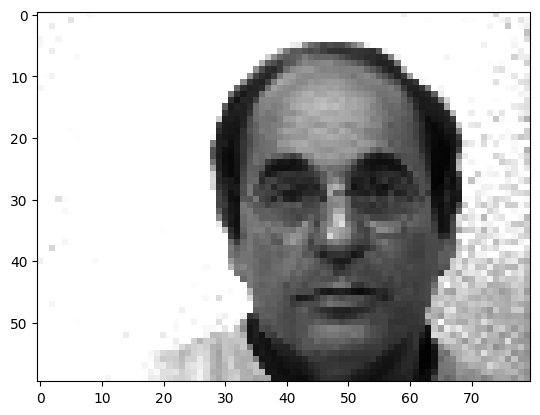

In [11]:
#look at an image for me


img=load_img(np.random.choice(files))
plt.imshow(img)
plt.show()

In [12]:
img.shape

(60, 80, 3)

In [13]:
image.img_to_array(image.load_img(np.random.choice(files))).shape

(243, 320, 3)

In [14]:
img.max(), img.min()

(255, 1)

In [15]:
def grayscale(img):
    return img.mean(axis=-1)

In [16]:
np.all(img[:,:,0]==img[:,:,1]), np.all(img[:,:,0]==img[:,:,2])

(True, True)

In [17]:
img[:,:,0]==img[:,:,1]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [18]:
#load images as arrays
shape=(N,H,W)

images=np.zeros(shape)
for i,f in enumerate(files):
    img=grayscale(load_img(f)) /255.
    images[i]=img

In [19]:
#make the labels
# all the filenames are sth subkuect112.sad
labels=np.zeros(N)
for i,f in enumerate(files):
    filename=f.rsplit("/",1)[-1]
    subject_num=filename.split(".",1)[0]

    #subtract 1 since the filenames start from 1 as python
    #starts from 0
    idx=int(subject_num.replace("data\subject",""))-1
    labels[i]=idx

In [20]:
labels

array([ 4., 10.,  4., 12.,  5.,  2.,  9.,  2.,  4.,  0.,  9., 10.,  3.,
       12., 14.,  1.,  0., 13.,  5.,  3.,  8.,  4.,  8., 14.,  4., 14.,
        6.,  8.,  6.,  2.,  9.,  9., 13., 14.,  6., 13.,  2., 11., 13.,
        7., 11.,  3., 14.,  8.,  0.,  7.,  7.,  9., 10.,  8.,  2.,  9.,
        3.,  3.,  5.,  3., 10., 13., 12.,  8., 11., 13.,  5., 11., 11.,
        4., 12.,  7.,  1., 10., 12.,  7.,  9., 10., 10.,  8., 12.,  8.,
       12.,  0.,  0.,  6.,  6., 11.,  3.,  3., 11.,  1., 10.,  6.,  9.,
        5.,  0.,  8., 12., 13., 14., 14.,  1.,  2.,  4., 11.,  1.,  6.,
        4.,  7.,  1., 12.,  2.,  1.,  8.,  5., 11.,  6.,  3.,  3., 13.,
        5.,  0., 13.,  7.,  0.,  5.,  1.,  6.,  2.,  9.,  7., 14.,  3.,
       13., 14., 12., 10.,  1., 10.,  5.,  2.,  0.,  9.,  5., 14.,  7.,
        6.,  7.,  7.,  4., 12., 11.,  2., 11.,  0.,  5., 10.,  1.,  0.,
        9.,  8., 14., 13.,  4.,  1.,  2.,  6.,  4.])

In [21]:
label_count=Counter(labels)
label_count

Counter({4.0: 11,
         10.0: 11,
         12.0: 11,
         5.0: 11,
         2.0: 11,
         9.0: 11,
         0.0: 11,
         3.0: 11,
         14.0: 11,
         1.0: 11,
         13.0: 11,
         8.0: 11,
         6.0: 11,
         11.0: 11,
         7.0: 11})

In [22]:
#int(f.rsplit("/",1)[-1].split(".",1)[0].replace("subject",""))

In [23]:
#Counter(f)

In [24]:
unique_labels=set(label_count.keys())
unique_labels

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0}

In [25]:
#get the number of subjects
n_subjects=len(label_count)
n_subjects

15

In [26]:
## make 3 images for each are test data
n_test=3*n_subjects
n_train=N-n_test

In [27]:
#initlaze arrays to hold train and test images
train_images=np.zeros([n_train]+list(img.shape))
train_labels=np.zeros(n_train)
test_images=np.zeros([n_test]+list(img.shape))
test_labels=np.zeros(n_test)

In [28]:
list(img.shape), n_test, n_train

([60, 80], 45, 120)

In [29]:
np.zeros([n_train]+list(img.shape)).shape
#train size , image.shape

(120, 60, 80)

In [30]:
count_so_far={}
train_idx=0
test_idx=0
for img,label in zip(images,labels):
    #increment the count
    count_so_far[label]=count_so_far.get(label,0)+1

    if count_so_far[label]>3:
        #we have 3 for the test 
        #add rest to train
        train_images[train_idx]=img
        train_labels[train_idx]=label
        train_idx+=1

    else:
        #add this first 3 iamges to test
        test_images[test_idx]=img
        test_labels[test_idx]=label
        test_idx+=1

In [31]:
count_so_far

{4.0: 11,
 10.0: 11,
 12.0: 11,
 5.0: 11,
 2.0: 11,
 9.0: 11,
 0.0: 11,
 3.0: 11,
 14.0: 11,
 1.0: 11,
 13.0: 11,
 8.0: 11,
 6.0: 11,
 11.0: 11,
 7.0: 11}

In [32]:
#label2idx mapping for easy access
train_label2idx={}
test_label2idx={}

for i,label in enumerate(train_labels):
    if label not in train_label2idx:
        train_label2idx[label]=[i]
    else:
        train_label2idx[label].append(i)

for i, label in enumerate(test_labels):
    if label not in test_label2idx:
        test_label2idx[label]=[i]
    else:
        test_label2idx[label].append(i)



In [33]:
# all possible training sampe indices
train_positives=[]
train_negatives=[]
test_positives=[]
test_negatives=[]

for label, indices in train_label2idx.items():
    # all indices that do no belong to this subject
    other_indices=set(range(n_train))-set(indices)

    for i, idx1 in enumerate(indices):
        for idx2 in indices[i+1:]:
            train_positives.append((idx1,idx2))

        for idx2 in other_indices:
            train_negatives.append((idx1,idx2))

for label, indices in test_label2idx.items():
    #all indices that do not belong to this subject
    other_indices=set(range(n_test))-set(indices)

    for i, idx1 in enumerate(indices):
        for idx2 in indices[i+1:]:
            test_positives.append((idx1,idx2))

        for idx2 in other_indices:
            test_negatives.append((idx1, idx2))

In [34]:
len(set(range(n_test))-set(indices)) 


42

In [35]:
len(test_label2idx.items()), set(test_label2idx)

(15,
 {0.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0})

In [36]:
batch_size=64
def train_generator():
    #for each batch we ll send 1 pair of each subject
    #and the sample number of non matching pairs
    n_batches= int(np.ceil(len(train_positives)/(batch_size)))

    while True:
        np.random.shuffle(train_positives)
        n_samples=batch_size*2
        shape=(n_samples,H,W)
        x_batch_1=np.zeros(shape)
        x_batch_2=np.zeros(shape)
        y_batch=np.zeros(n_samples)

        for i in range(n_batches):
            pos_batch_indices=train_positives[i * batch_size: (i+1) * batch_size]

            # fill up x batch and y batch
            j=0
            for idx1, idx2 in pos_batch_indices:
                x_batch_1[j]=train_images[idx1]
                x_batch_2[j]=train_images[idx2]
                y_batch[j]=1 #match
                j +=1

            # get negative samples
            neg_indices=np.random.choice(len(train_negatives), size=len(pos_batch_indices)) #replace =
            for neg in neg_indices:
                idx1,idx2=train_negatives[neg]
                x_batch_1[j]=train_images[idx1]
                x_batch_2[j]=train_images[idx2]
                y_batch[j]=0 #non match
                j +=1

            x1=x_batch_1[:j]
            x2=x_batch_2[:j]
            y=y_batch[:j]

            #reshpae

            x1=x1.reshape(-1,1,H,W)
            x2=x2.reshape(-1,1,H,W)

            #convert to torch tensor
            x1=torch.from_numpy(x1).float()
            x2=torch.from_numpy(x2).float()
            y=torch.from_numpy(y).float()

            yield [x1,x2] ,y

In [37]:
#same thing as the train generator except no shıffling 

def test_generator():
    n_batches=int(np.ceil(len(train_positives)/ batch_size))

    while True:
        n_samples=batch_size*2
        shape=(n_samples,H,W)
        x_batch_1=np.zeros(shape)
        x_batch_2=np.zeros(shape)
        y_batch=np.zeros(n_samples)

        for i in range(n_batches):
            pos_batch_indices=test_positives[i * batch_size:(i+1) * batch_size]

            #fill up the x batch and y batch
            j=0
            for idx1, idx2 in pos_batch_indices:
                x_batch_1[j]=test_images[idx1]
                x_batch_2[j]=test_images[idx2]
                y_batch[j]=1 #match
                j +=1

                # get negative samples
                neg_indices=np.random.choice(len(test_negatives), size=len(pos_batch_indices)) #replace.
            for neg in neg_indices:
                idx1,idx2 = test_negatives[neg]
                x_batch_1[j]=test_images[idx1]
                x_batch_2[j]=test_images[idx2]
                y_batch[j]=0 #non match
                j +=1

            x1=x_batch_1[:1]
            x2=x_batch_2[:j]
            y=y_batch[:j]

            # reshape
            x1=x1.reshape(-1,1,H,W)
            x2=x2.reshape(-1,1,H,W)

            #convert this to torch tensors
            x1=torch.from_numpy(x1).float()
            x2=torch.from_numpy(x2).float()
            y=torch.from_numpy(y).float()

            yield [x1,x2], y



In [38]:
#build the model

class SiameseNN(nn.Module):
    def __init__(self, feature_dim):
        super(SiameseNN, self).__init__()

        #define CNN Featurizer

        self.cnn=nn.Sequential(
            nn.Conv2d(1,32,kernel_size=3),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(13*18*64,128), #60>29>13, 80>39>18
            nn.ReLU(),
            nn.Linear(128,feature_dim),
        )
    def forward(self,im1,im2):
        feat1=self.cnn(im1)
        feat2=self.cnn(im2)

        #euclidean distance between feature 1 and feature 2
        return torch.norm(feat1-feat2,dim=-1)


In [39]:
model=SiameseNN(50)

In [40]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


SiameseNN(
  (cnn): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=14976, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=50, bias=True)
  )
)

In [41]:
# loss function for siamese network
def contrastive_loss(y,t):
    nonmatch=F.relu(1-y) # max(margin -y , 0)
    return torch.mean(t* y**2 + (1-t) *nonmatch**2)

In [42]:
#loss and optimizer
optimizer=torch.optim.Adam(model.parameters())

In [43]:
#A function to encapsulate the training loop
def batch_gd(
        model,
        criterion,
        optimizer,
        train_gen,
        test_gen,
        train_steps_per_epoch,
        test_steps_per_epoch,
        epochs):
    train_losses= np.zeros(epochs)
    test_losses=np.zeros(epochs)

    for it in range(epochs):
        t0=datetime.now()
        train_loss=[]
        steps=0
        for (x1,x2),targets in train_gen:
            #move data to GPU
            x1, x2, targets= x1.to(device), x2.to(device), targets.to(device)


            # zero the parameter gradients
            optimizer.zero_grad()

            #forward pass
            outputs=model(x1,x2)
            loss=criterion(outputs, targets)

            #backward and optimize
            loss.backward()
            optimizer.step()

            train_loss.append(loss.item())

            #update steps
            steps +=1
            if steps >= train_steps_per_epoch:
                break

        # get train loss and test loss
        train_loss= np.mean(train_loss) # a little misleading

        test_loss=[]
        steps=0
        for (x1,x2), targets in test_gen:
            x1, x2, targets= x1.to(device), x2.to(device), targets.to(device)
            outputs=model(x1,x2)
            loss=criterion(outputs,targets)
            test_loss.append(loss.item())
            steps +=1
            if steps >= train_steps_per_epoch:
                break

        test_loss= np.mean(test_loss)

        #save losses
        train_losses[it]=train_loss
        test_losses[it]=test_loss

        dt=datetime.now() -t0
        print(f'epoch: {it+1}/{epochs}, train loss: {train_loss:.4f}, \
              Test loss: {test_loss:.4f}, duration: {dt}')
    
    return train_losses, test_losses

In [44]:
train_steps=int(np.ceil(len(train_positives)/ batch_size))
test_steps=int(np.ceil(len(test_positives)/batch_size))



In [45]:
train_losses, test_losses = batch_gd(
    model,
    contrastive_loss,
    optimizer,
    train_generator(),
    test_generator(),
    train_steps,
    test_steps,
    epochs=20)

epoch: 1/20, train loss: 0.8481,               Test loss: 0.1572, duration: 0:00:04.130712
epoch: 2/20, train loss: 0.2803,               Test loss: 0.2145, duration: 0:00:04.034530
epoch: 3/20, train loss: 0.1569,               Test loss: 0.1413, duration: 0:00:04.109996
epoch: 4/20, train loss: 0.0995,               Test loss: 0.2016, duration: 0:00:04.111310
epoch: 5/20, train loss: 0.0734,               Test loss: 0.2304, duration: 0:00:04.103899
epoch: 6/20, train loss: 0.0490,               Test loss: 0.1450, duration: 0:00:04.097496
epoch: 7/20, train loss: 0.0391,               Test loss: 0.1534, duration: 0:00:03.983543
epoch: 8/20, train loss: 0.0287,               Test loss: 0.1552, duration: 0:00:03.928678
epoch: 9/20, train loss: 0.0203,               Test loss: 0.1600, duration: 0:00:03.994588
epoch: 10/20, train loss: 0.0156,               Test loss: 0.1314, duration: 0:00:03.979283
epoch: 11/20, train loss: 0.0122,               Test loss: 0.1709, duration: 0:00:04.0645

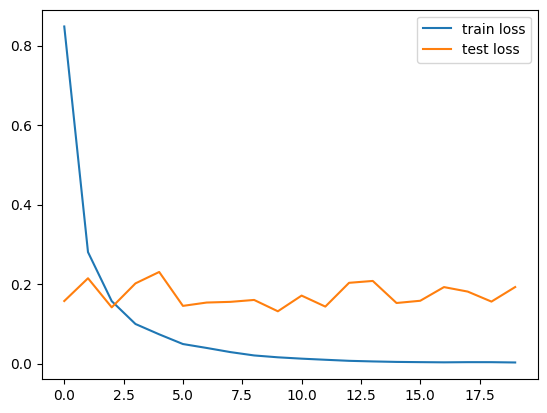

In [46]:
#plot the loss 

plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

In [47]:
# make predictions
def predict(x1,x2):
    x1=torch.from_numpy(x1).float().to(device)
    x2=torch.from_numpy(x2).float().to(device)
    with torch.no_grad():
        dist=model(x1,x2).cpu().numpy()
        return dist.flatten()


In [48]:
#accuracy
#dataset is imbalanced so get tp,tn,fp,fn
def get_train_accuracy(threshold=0.85):
    positive_distances=[]
    negative_distances=[]

    tp=0
    tn=0
    fp=0
    fn=0

    batch_size=64
    x_batch_1=np.zeros((batch_size,1,H,W))
    x_batch_2=np.zeros((batch_size,1,H,W))
    n_batches=int(np.ceil(len(train_positives)/batch_size))

    for i in range(n_batches):
        print(f'pos batch: {i+1}/{n_batches}')
        pos_batch_indices=train_positives[i * batch_size: (i+1) * batch_size]

        # fill up x_batch and y_batch
        j=0
        for idx1, idx2 in pos_batch_indices:
            x_batch_1[j,0] = train_images[idx1]
            x_batch_2[j,0] = train_images[idx2]
            j +=1

        x1= x_batch_1[:j]
        x2= x_batch_2[:j]
        distances=predict(x1,x2)
        positive_distances += distances.tolist()

        #update tp, tn, fp, fn
        tp += (distances < threshold).sum()
        fn += (distances > threshold).sum()

    n_batches=int(np.ceil(len(train_negatives)/batch_size))
    for i in range(n_batches):
        print(f'neg batch:{i+1}/{n_batches}')
        neg_batch_indices = train_negatives[i * batch_size: (i+1) * batch_size]

        #fill up x_batch and y_batch
        j=0
        for idx1,idx2 in neg_batch_indices:
            x_batch_1[j,0] = train_images[idx1]
            x_batch_2[j,0] = train_images[idx2]
            j +=1

        x1 = x_batch_1[:j]
        x2 = x_batch_2[:j]
        distances = predict(x1,x2)
        negative_distances += distances.tolist()

        #update tp,tn, fp, fn
        fp += (distances < threshold).sum()
        tn += (distances > threshold).sum()

    tpr =tp / (tp+fn)
    tnr = tn / (tn+fp)
    print(f'sensitivity (tpr):{tpr}, specificity (tnr): {tnr}')

    plt.hist(negative_distances, bins=20 ,density=True, label='negative distances')
    plt.hist(positive_distances, bins=20, density=True, label='positive distances')
    plt.legend()
    plt.show()

In [49]:
def get_test_accuracy(threshold=0.85):
    positive_distances=[]
    negative_distances=[]

    
    tp=0
    tn=0
    fp=0
    fn=0

    batch_size=64
    x_batch_1=np.zeros((batch_size,1,H,W))
    x_batch_2=np.zeros((batch_size,1,H,W))
    n_batches=int(np.ceil(len(test_positives)/batch_size))

    for i in range(n_batches):
        print(f'pos batch: {i+1}/{n_batches}')
        pos_batch_indices=test_positives[i * batch_size: (i+1) * batch_size]

        # fill up x_batch and y_batch
        j=0
        for idx1, idx2 in pos_batch_indices:
            x_batch_1[j,0] = test_images[idx1]
            x_batch_2[j,0] = test_images[idx2]
            j +=1

        x1= x_batch_1[:j]
        x2= x_batch_2[:j]
        distances=predict(x1,x2)
        positive_distances += distances.tolist()

        #update tp, tn, fp, fn
        tp += (distances < threshold).sum()
        fn += (distances > threshold).sum()

    n_batches=int(np.ceil(len(test_negatives)/batch_size))
    for i in range(n_batches):
        print(f'neg batch:{i+1}/{n_batches}')
        neg_batch_indices = test_negatives[i * batch_size: (i+1) * batch_size]

        #fill up x_batch and y_batch
        j=0
        for idx1,idx2 in neg_batch_indices:
            x_batch_1[j,0] = test_images[idx1]
            x_batch_2[j,0] = test_images[idx2]
            j +=1

        x1 = x_batch_1[:j]
        x2 = x_batch_2[:j]
        distances = predict(x1,x2)
        negative_distances += distances.tolist()

        #update tp,tn, fp, fn
        fp += (distances < threshold).sum()
        tn += (distances > threshold).sum()

    tpr =tp / (tp+fn)
    tnr = tn / (tn+fp)
    print(f'sensitivity (tpr):{tpr}, specificity (tnr): {tnr}')

    plt.hist(negative_distances, bins=20 ,density=True, label='negative distances')
    plt.hist(positive_distances, bins=20, density=True, label='positive distances')
    plt.legend()
    plt.show()

    

pos batch: 1/7
pos batch: 2/7
pos batch: 3/7
pos batch: 4/7
pos batch: 5/7
pos batch: 6/7
pos batch: 7/7
neg batch:1/210
neg batch:2/210
neg batch:3/210
neg batch:4/210
neg batch:5/210
neg batch:6/210
neg batch:7/210
neg batch:8/210
neg batch:9/210
neg batch:10/210
neg batch:11/210
neg batch:12/210
neg batch:13/210
neg batch:14/210
neg batch:15/210
neg batch:16/210
neg batch:17/210
neg batch:18/210
neg batch:19/210
neg batch:20/210
neg batch:21/210
neg batch:22/210
neg batch:23/210
neg batch:24/210
neg batch:25/210
neg batch:26/210
neg batch:27/210
neg batch:28/210
neg batch:29/210
neg batch:30/210
neg batch:31/210
neg batch:32/210
neg batch:33/210
neg batch:34/210
neg batch:35/210
neg batch:36/210
neg batch:37/210
neg batch:38/210
neg batch:39/210
neg batch:40/210
neg batch:41/210
neg batch:42/210
neg batch:43/210
neg batch:44/210
neg batch:45/210
neg batch:46/210
neg batch:47/210
neg batch:48/210
neg batch:49/210
neg batch:50/210
neg batch:51/210
neg batch:52/210
neg batch:53/210
neg

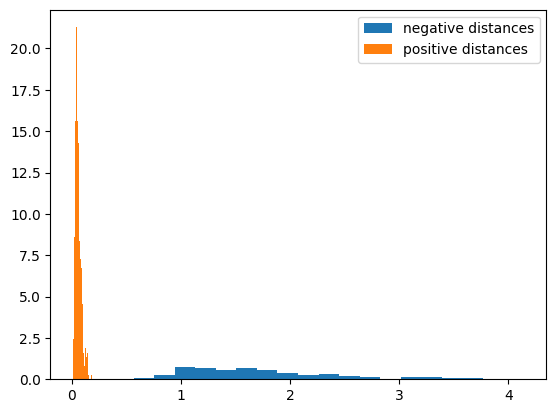

In [50]:
get_train_accuracy(0.65)

pos batch: 1/1
neg batch:1/30
neg batch:2/30
neg batch:3/30
neg batch:4/30
neg batch:5/30
neg batch:6/30
neg batch:7/30
neg batch:8/30
neg batch:9/30
neg batch:10/30
neg batch:11/30
neg batch:12/30
neg batch:13/30
neg batch:14/30
neg batch:15/30
neg batch:16/30
neg batch:17/30
neg batch:18/30
neg batch:19/30
neg batch:20/30
neg batch:21/30
neg batch:22/30
neg batch:23/30
neg batch:24/30
neg batch:25/30
neg batch:26/30
neg batch:27/30
neg batch:28/30
neg batch:29/30
neg batch:30/30
sensitivity (tpr):0.8222222222222222, specificity (tnr): 0.9666666666666667


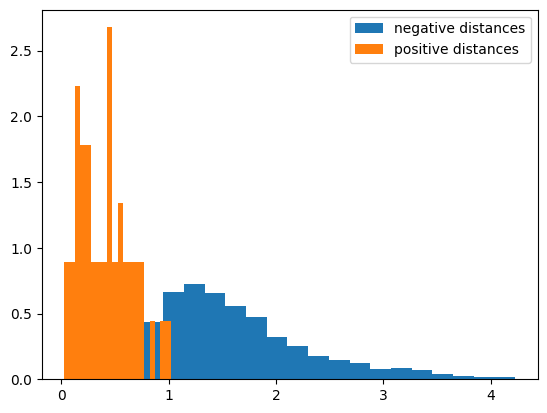

In [51]:
get_test_accuracy(0.65)